<a href="https://colab.research.google.com/github/Girra02/PDS/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
np.random.seed(9336)

In [6]:
#a. Glucose comparision with population variable
sample_data = data.sample(n=25, random_state=9336)
mean_glucose_sample = sample_data['Glucose'].mean()
print("Mean Glucose in Sample:", mean_glucose_sample)
max_glucose_sample = sample_data['Glucose'].max()
print("Max Glucose in Sample:", max_glucose_sample)
mean_glucose_population = data['Glucose'].mean()
print("Mean Glucose in Population:", mean_glucose_population)
max_glucose_population = data['Glucose'].max()
print("Max Glucose in Population:", max_glucose_population)

Mean Glucose in Sample: 131.76
Max Glucose in Sample: 194
Mean Glucose in Population: 120.89453125
Max Glucose in Population: 199


Text(0.5, 1.0, 'Max Glucose: Sample vs Population')

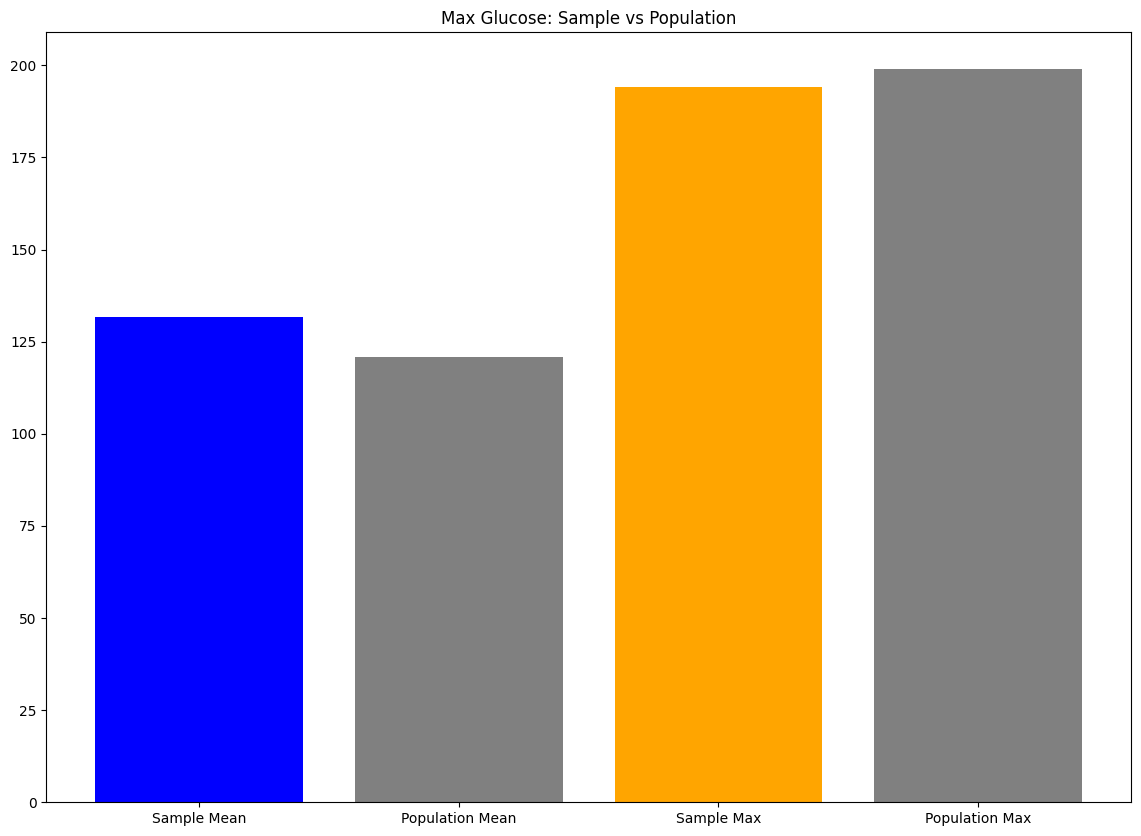

In [11]:
# Plotting of Mean Glucose
fig, axs = plt.subplots(1, 1, figsize=(14, 10))

axs.bar(['Sample Mean', 'Population Mean'],
              [mean_glucose_sample, mean_glucose_population],
              color=['blue', 'gray'])
axs.set_title('Mean Glucose: Sample vs Population')

# Plotting of Max Glucose
axs.bar(['Sample Max', 'Population Max'],
              [max_glucose_sample, max_glucose_population],
              color=['orange', 'gray'])
axs.set_title('Max Glucose: Sample vs Population')

In [12]:
#b. 98th percentile of bmi
sample_bmi_98 = np.percentile(sample_data['BMI'], 98)
print("98th Percentile of BMI in Sample:", sample_bmi_98)

population_bmi_98 = np.percentile(data['BMI'], 98)
print("98th Percentile of BMI in Population:", population_bmi_98)

98th Percentile of BMI in Sample: 57.35599999999999
98th Percentile of BMI in Population: 47.52599999999996


Text(0.5, 1.0, '98th BMI: Sample vs Population')

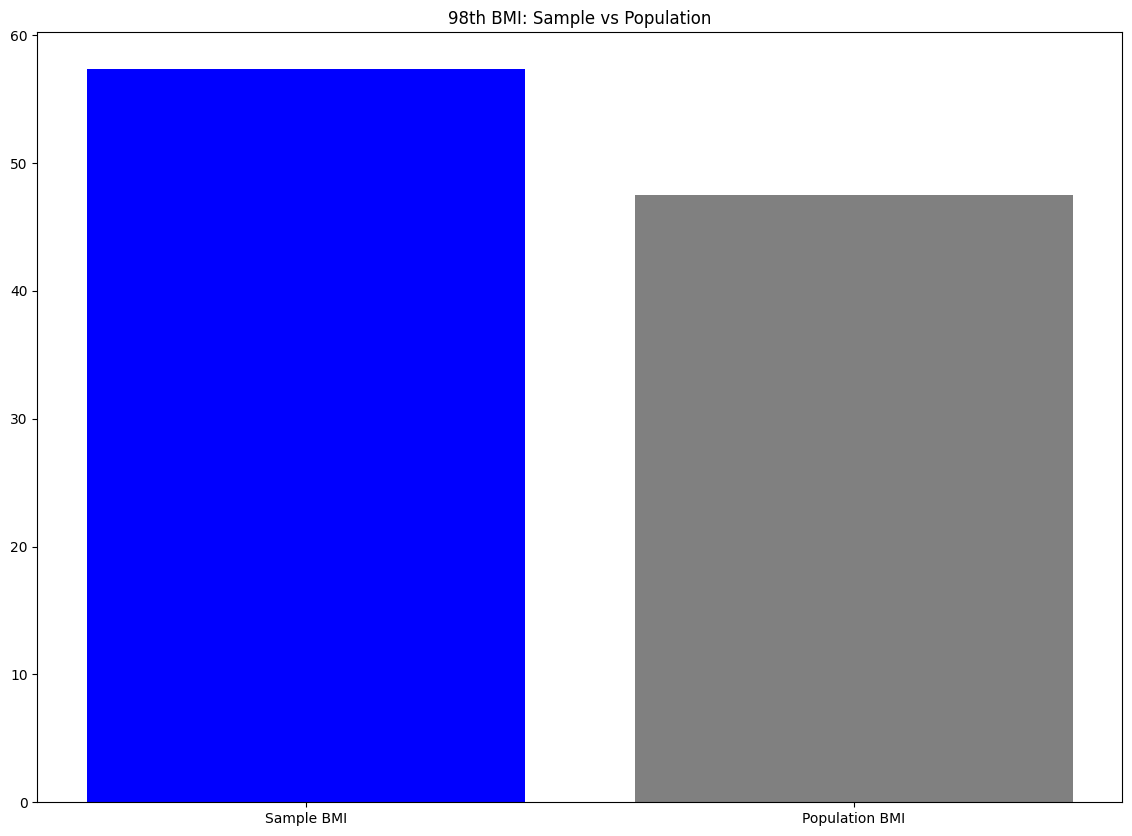

In [13]:
# Plotting of 98th percentile of bmi
fig, axs = plt.subplots(1, 1, figsize=(14, 10))

axs.bar(['Sample BMI', 'Population BMI'],
              [sample_bmi_98, population_bmi_98],
              color=['blue', 'gray'])
axs.set_title('98th BMI: Sample vs Population')


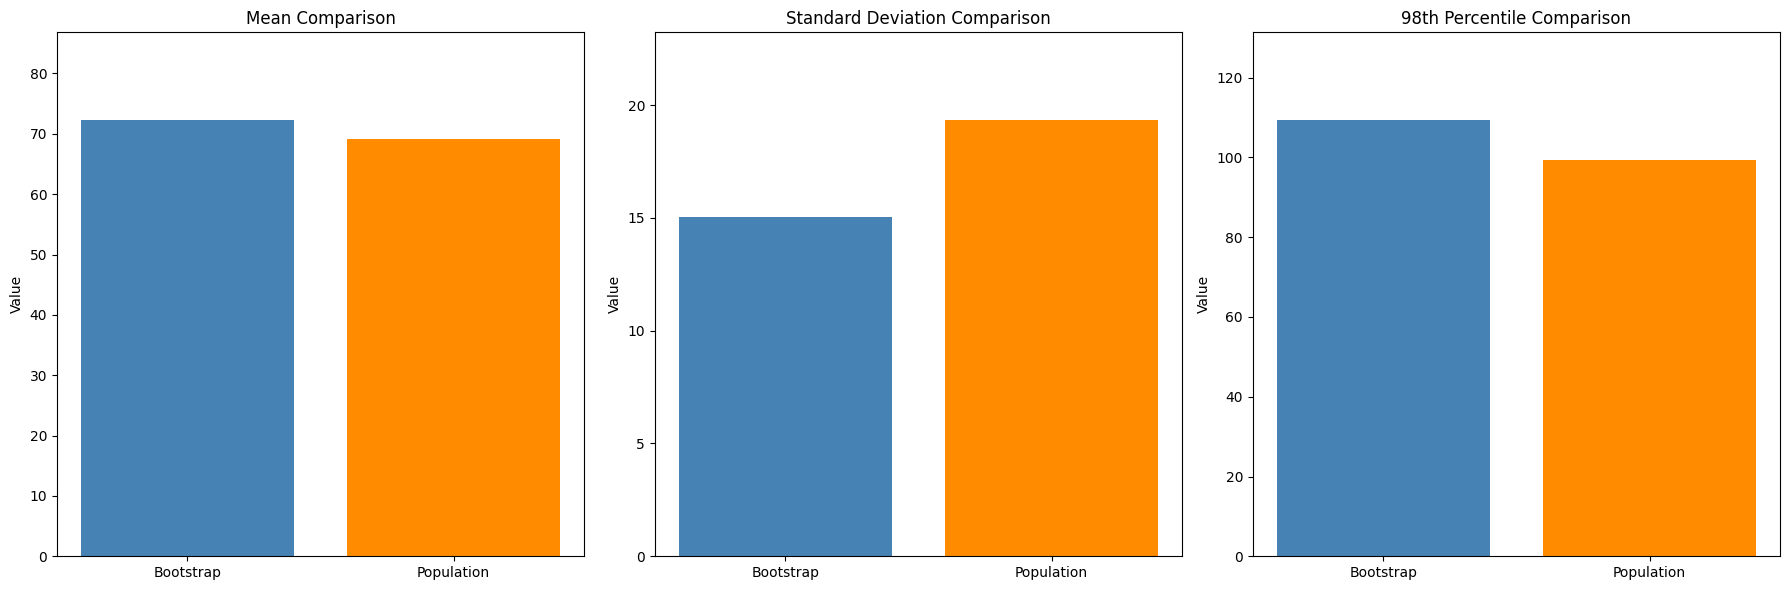

In [23]:
bootstrap_mean = []
bootstrap_std = []
bootstrap_percentile = []

for _ in range(500):
    bootstrap_sample = sample_data['BloodPressure'].sample(n=150, replace=True)
    bootstrap_mean.append(bootstrap_sample.mean())
    bootstrap_std.append(bootstrap_sample.std())
    bootstrap_percentile.append(np.percentile(bootstrap_sample, 98))

bp_population_mean = data['BloodPressure'].mean()
bp_population_std = data['BloodPressure'].std()
bp_population_percentile = np.percentile(data['BloodPressure'], 98)

# Bootstrap averages
boot_mean_avg = np.mean(bootstrap_mean)
boot_std_avg = np.mean(bootstrap_std)
boot_98th_avg = np.mean(bootstrap_percentile)

# Data setup for bar charts
categories = ['Mean', 'Standard Deviation', '98th Percentile']
bootstrap_vals = [boot_mean_avg, boot_std_avg, boot_98th_avg]
population_vals = [bp_population_mean, bp_population_std, bp_population_percentile]

# Create subplots for bar charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot each bar chart
for i in range(3):
  axs[i].bar(['Bootstrap', 'Population'],
   [bootstrap_vals[i], population_vals[i]],
             color=['steelblue', 'darkorange'])
  axs[i].set_title(f'{categories[i]} Comparison')
  axs[i].set_ylabel('Value')
  axs[i].set_ylim(0, max(bootstrap_vals[i], population_vals[i]) * 1.2)

plt.tight_layout()
plt.show()
